# ML TECHNIQUES

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

In [30]:
def toMB(value):
    try :
        if 'MB' in value:
            return int(float(value.replace('MB', '').strip()))
        elif 'GB' in value:
            return int(float(value.replace('GB', '').strip()) * 1024)
        elif 'TB' in value:
            return int(float(value.replace('TB', '').strip()) * 1024 * 1024)
    except:
        print(value)
        return value
    
def conversiontoMB(data):
    data_converted = data.copy()
    data_converted['Memory'] = data['Memory'].dropna().apply(toMB)
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 32 GB", "32 GB")
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 16 GB", "16 GB")
    data_converted['Storage'] = data_converted['Storage'].dropna().apply(toMB)
    return data_converted


In [31]:
data= pd.read_csv('Sales.csv')

In [32]:
data_converted = conversiontoMB(data)
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   float64
 4   Storage              3075 non-null   float64
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 292.1+ KB


In [33]:

data_converted = data_converted.dropna()
data_converted

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8192.0,131072.0,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2048.0,16384.0,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4096.0,65536.0,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4096.0,65536.0,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8.0,16.0,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512.0,4096.0,Yes,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4.0,2.0,Yes,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6144.0,131072.0,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3111,Apple,iPhone SE,White,2048.0,131072.0,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000


In [34]:
data_converted = data_converted.drop(columns=['Camera'])

In [35]:
data_converted.describe(include='object')  

,Brands,Models,Colors,Mobile
count,2897,2897,2897,2897
unique,17,877,622,891
top,SAMSUNG,iPhone 11,Black,Apple iPhone 11
freq,685,36,446,36


In [36]:
categorical_columns = data_converted.select_dtypes(include=['object']).columns

ordinal_encoder = OrdinalEncoder()

data_converted[categorical_columns] = ordinal_encoder.fit_transform(data_converted[categorical_columns])

In [37]:
data_converted.describe()

,Brands,Models,Colors,Memory,Storage,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
count,2897.000000,2897.000000,2897.000000,2897.000000,2.897000e+03,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,9.485330,456.059027,286.270625,4170.691405,8.760485e+04,4.241319,24692.492233,26656.677943,438.192268,1964.185709,6.222417
std,5.006888,269.774393,196.419005,2475.611668,9.633680e+04,0.272841,26373.592602,28251.233298,272.495812,5505.394873,11.353050
min,0.000000,0.000000,0.000000,2.000000,2.000000e+00,2.300000,1000.000000,1000.000000,0.000000,-8000.000000,-160.320641
25%,6.000000,228.000000,66.000000,2048.000000,3.276800e+04,4.100000,9990.000000,10389.000000,170.000000,0.000000,0.000000
50%,11.000000,444.000000,257.000000,4096.000000,6.553600e+04,4.300000,14999.000000,16300.000000,474.000000,0.000000,0.000000
75%,13.000000,689.000000,471.000000,6144.000000,1.310720e+05,4.400000,27499.000000,29999.000000,673.000000,2000.000000,9.836388
max,16.000000,876.000000,621.000000,16384.000000,1.048576e+06,5.000000,179900.000000,189999.000000,890.000000,75000.000000,70.610305


In [38]:
features = data_converted[['Memory', 'Storage','Rating','Discount','Brands','Models','Discount','discount percentage']]
label = data_converted[['Selling Price']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
print(y_train)

# Reshape the target variable
y_train = y_train.values.ravel()
#print(y_train)
y_test = y_test.values.ravel()

      Selling Price
179            4999
2344           9999
280           16499
2578           3990
1548         149999
...             ...
1764          14449
1176           2540
1215          29199
1393          36299
927           17999

[2317 rows x 1 columns]


## Linear regression

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print(f'Standard deviation of the target variable: {np.std(y_test)}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 13795.347306763846
Standard deviation of the target variable: 24424.647379014754
R^2 Score: 0.6809867862405183


## KNN

In [42]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f'KNN Root Mean Squared Error: {rmse}')
print(f'KNN Standard deviation of the target variable: {np.std(y_test)}')
print(f'KNN R^2 Score: {r2}')

KNN Root Mean Squared Error: 13795.347306763846
KNN Standard deviation of the target variable: 24424.647379014754
KNN R^2 Score: 0.6809867862405183


## Polynomial Regression

In [43]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print(f'Polynomial Regression Root Mean Squared Error: {rmse_poly}')
print(f'Polynomial Regression Standard deviation of the target variable: {np.std(y_test)}')
print(f'Polynomial Regression R^2 Score: {r2_poly}')

Polynomial Regression Root Mean Squared Error: 12602.751146998353
Polynomial Regression Standard deviation of the target variable: 24424.647379014754
Polynomial Regression R^2 Score: 0.733759502204566


##  Random Forest Regression

In [48]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Random Forest Root Mean Squared Error: {rmse_rf}')
print(f'Random Forest Standard deviation of the target variable: {np.std(y_test)}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Root Mean Squared Error: 5800.423693751334
Random Forest Standard deviation of the target variable: 24424.647379014754
Random Forest R^2 Score: 0.9436021132872057


## AdaBoost Regression

In [49]:
base_estimator = DecisionTreeRegressor(max_depth=3)
ada = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)

print(f'AdaBoost Root Mean Squared Error: {rmse_ada}')
print(f'AdaBoost Standard deviation of the target variable: {np.std(y_test)}')
print(f'AdaBoost R^2 Score: {r2_ada}')

AdaBoost Root Mean Squared Error: 17912.208359829605
AdaBoost Standard deviation of the target variable: 24424.647379014754
AdaBoost R^2 Score: 0.46217416531607225


In [51]:
ml_models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Polynomial Regression', 'Random Forest', 'AdaBoost'],
    'RMSE': [rmse, rmse_knn, rmse_poly, rmse_rf, rmse_ada],
    'R^2': [r2, r2_knn, r2_poly, r2_rf, r2_ada]
})
ml_models

,Model,RMSE,R^2
0,Linear Regression,13795.347307,0.680987
1,KNN,9326.319608,0.854198
2,Polynomial Regression,12602.751147,0.733760
3,Random Forest,5800.423694,0.943602
4,AdaBoost,17912.208360,0.462174


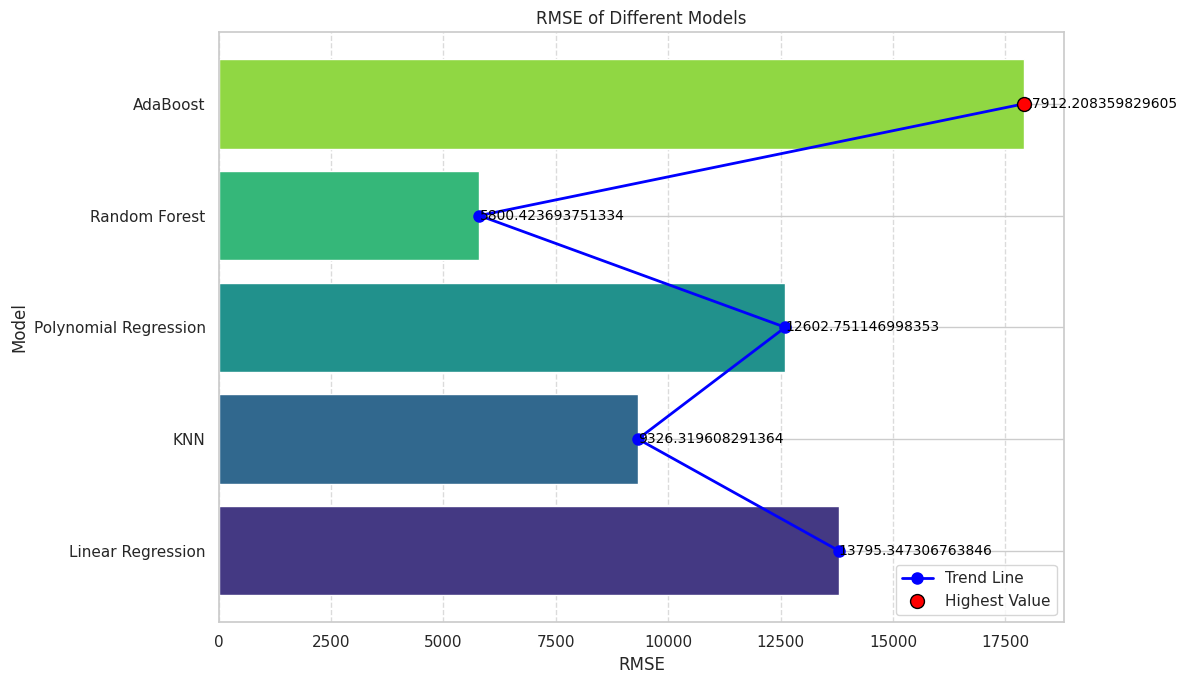

In [59]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title('RMSE of Different Models')

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(ml_models))
bars = plt.barh(ml_models['Model'], ml_models['RMSE'], color=custom_palette)

# Add a trend line
x = np.arange(len(ml_models))
plt.plot(ml_models['RMSE'], x, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

# Mark the highest value
max_value = ml_models['RMSE'].max()
max_index = ml_models['Model'][ml_models['RMSE'].idxmax()]
plt.scatter(max_value, ml_models['Model'][ml_models['RMSE'].idxmax()], color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

# Add a legend
plt.legend()

# Customize x-axis and y-axis labels
plt.xlabel('RMSE')
plt.ylabel('Model')

# Show the plot
plt.tight_layout()
plt.show()

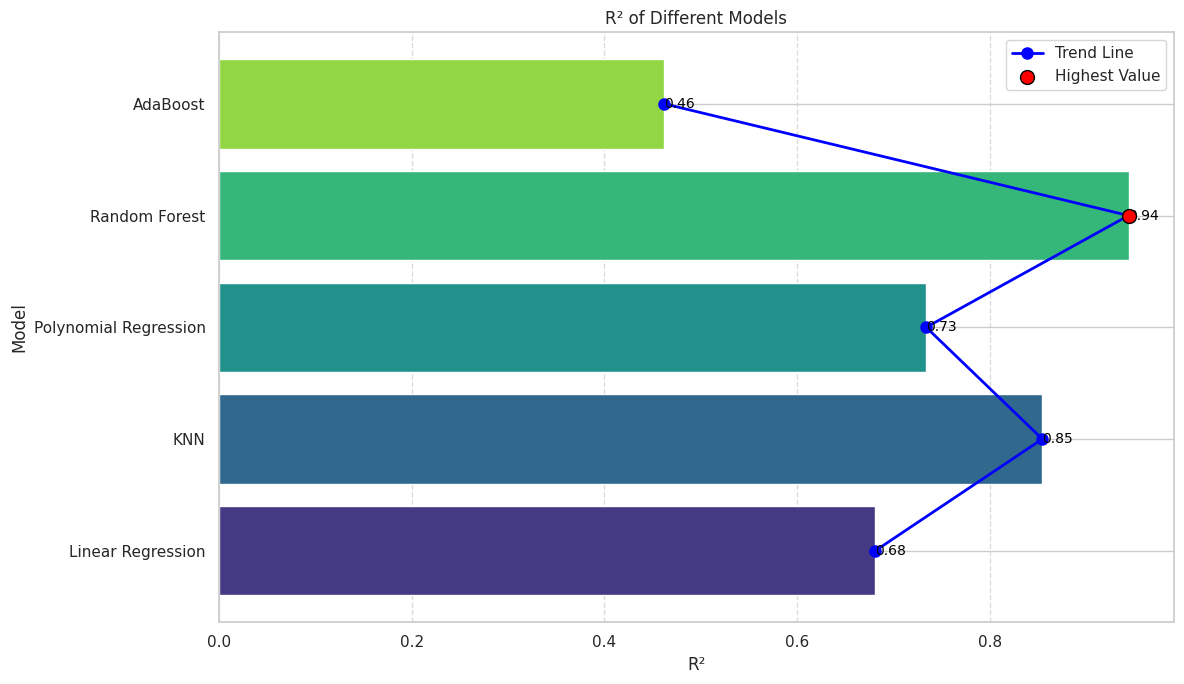

In [60]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title('R² of Different Models')

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(ml_models))
bars = plt.barh(ml_models['Model'], ml_models['R^2'], color=custom_palette)

# Add a trend line
x = np.arange(len(ml_models))
plt.plot(ml_models['R^2'], x, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10, color='black')

# Mark the highest value
max_value = ml_models['R^2'].max()
max_index = ml_models['Model'][ml_models['R^2'].idxmax()]
plt.scatter(max_value, ml_models['Model'][ml_models['R^2'].idxmax()], color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

# Add a legend
plt.legend()

# Customize x-axis and y-axis labels
plt.xlabel('R²')
plt.ylabel('Model')

# Show the plot
plt.tight_layout()
plt.show()


